# Drift simulation

In [1]:
# !pip install pyteseo && pyteseo-tests

In [2]:
import os
from pyteseo.wrapper import TeseoWrapper
import pyteseo.tests as tests_
from pathlib import Path
from datetime import datetime, timedelta
from pyteseo.connections.cmems import access_global_currents, access_global_winds
from pyteseo.io.forcings import write_2d_forcing

import warnings

warnings.simplefilter(action="ignore")


WARNING - .env file has not been loaded!


In [3]:
# !python-dotenv set CMEMS_username username
# !python-dotenv set CMEMS_password password

username = os.environ.get("CMEMS_username")
password = os.environ.get("CMEMS_password")

In [4]:
# 1 - Generate job and its folder structure
job = TeseoWrapper(dir_path="../../tmp/draft_simulation")



Creating TESEO folder structure...
DONE! Created @ /home/aragong/repositories/pyteseo/tmp/draft_simulation



copying files to input-job path...
Loading grid...
Loading coastline...


<Axes: xlabel='lon', ylabel='lat'>

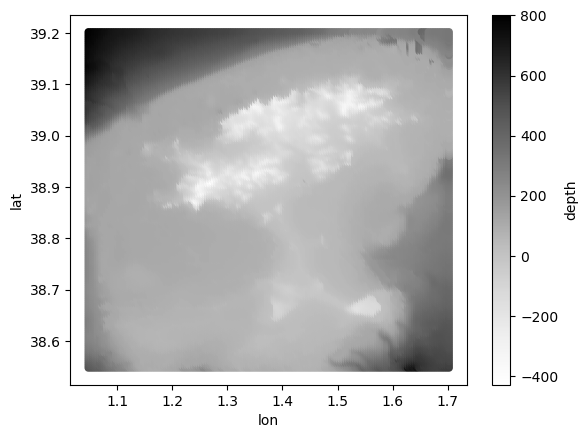

In [5]:
# 2 - Load domain files
domain_dir = Path(tests_.__file__).parent / "data/ibiza_domain"
job.load_domain(src_dir=domain_dir)
# plot grid
df = job.grid.load_df()
df.plot.scatter(x="lon", y="lat", c="depth")

In [6]:
# 3 - Generate forcings
drifter_spill_points = [
    {
        "release_time": datetime.utcnow() - timedelta(days=4) + timedelta(minutes=32),
        "lon": -3.725,
        "lat": 43.525,
        "initial_width": 1,
        "initial_length": 1,
    },
    {
        "release_time": datetime.utcnow() - timedelta(days=4) + timedelta(minutes=12),
        "lon": -3.8,
        "lat": 43.525,
        "initial_width": 1,
        "initial_length": 1,
    },
]

user_parameters = {
    "mode": "2d",
    "motion": "forward",
    "substance_type": "drifter",
    "forcings_init_time": datetime.utcnow() - timedelta(days=4),
    "duration": timedelta(hours=3),
    "timestep": timedelta(minutes=1),
    "use_coastline": True,
    "spill_points": drifter_spill_points,
}

# 3 - Generate forcings
bbox = (job.grid.x_min, job.grid.y_min, job.grid.x_max, job.grid.y_max)
timebox = (
    user_parameters["forcings_init_time"],
    user_parameters["forcings_init_time"] + user_parameters["duration"],
)
currents = access_global_currents(username, password, bbox, timebox)
write_2d_forcing(currents, job.input_dir, "currents")

winds = access_global_winds(username, password, bbox, timebox)
write_2d_forcing(winds, job.input_dir, "winds")

 garagon login successful! 🙂 

 garagon login successful! 🙂 



In [7]:
# 4 - Load forcings
job.load_forcings()

Loading currents...
Loading winds...
Loading waves...
DONE!



In [8]:
# 5 - setup model parameters
job.setup(user_parameters)

Setting up TESEO's cfg-file...
cfg-file created

Setting up TESEO's cfg-file...
run-file created

DONE!
